# Water Quality Classification 

**Author:** Charuta Shivanee Caullychurn  
**Date:** 15 July 2025  
**Course:** Final Year Project – Data Analytics

## 1. Introduction
The aim of this project is to develop a predictive model that can classify water samples as **safe** or **unsafe** based on their chemical and physical properties. This will help in monitoring water quality efficiently and assist in early detection of contamination.


## 2. Problem Statement
Water quality is essential for human health and environmental sustainability. Contaminated water can lead to severe health issues. Traditional water testing methods are often time-consuming and resource-intensive.  

This project aims to build a machine learning system using Deep Neural Networks (DNN) that can classify water samples accurately based on features such as pH, turbidity, dissolved oxygen, and other chemical properties.


In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf

print("Everything works! TensorFlow version:", tf.__version__)

Everything works! TensorFlow version: 2.20.0


## 3. Dataset Overview

The dataset used in this project contains water quality measurements collected from various stations. Each row represents a water sample, and the columns represent different chemical, biological, and environmental properties of the water.

The dataset includes the following features:

1. **Station Code**: Unique identifier for the water monitoring station.  
2. **Locations**: Specific location of the station.  
3. **State**: State or region where the station is located.  
4. **Temp**: Water temperature (°C).  
5. **D.O (mg/l)**: Dissolved oxygen concentration, important for aquatic life.  
6. **PH**: Acidity or alkalinity of the water.  
7. **Conductivity**: Electrical conductivity of the water, related to ion content.  
8. **B.O.D**: Biological Oxygen Demand, indicator of organic pollution.  
9. **Nitratenan N + Nitritenann**: Total nitrates and nitrites in water.  
10. **Fecal Coliform (MPN/100ml)**: Presence of fecal contamination.  
11. **Total Coliform (MPN/100ml)Mean**: General bacterial contamination level.  
12. **Year**: Year when the measurement was taken.

This dataset will be used to train and evaluate deep learning models to classify water quality based on its physical, chemical, and biological characteristics.


In [10]:
# Import necessary libraries
import pandas as pd

# Load the dataset
dataset_path = "water_dataX.csv"  
df = pd.read_csv(dataset_path, encoding='ISO-8859-1')

# Display the first 5 rows to check the dataset
df.head()


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


## 4. Exploratory Data Analysis (EDA)

Before building predictive models, it is important to understand the dataset thoroughly. 
EDA allows us to:

- Identify patterns and distributions in the data.
- Detect missing or inconsistent values.
- Understand relationships between features.
- Identify potential outliers.
- Guide preprocessing and feature engineering decisions.

In this section, we will perform a detailed analysis of each feature in the water quality dataset.


In [11]:
# Check data types and missing values
print("Data Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Quick overview
df.info()


Data Types:
 STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

Missing Values:
 STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                 

### 4.1 Data Types and Missing Values Interpretation

From the output, we observe the following:

1. Most features (`Temp`, `D.O. (mg/l)`, `PH`, `CONDUCTIVITY`, `B.O.D`, `NITRATENAN N+ NITRITENANN`, `FECAL COLIFORM`, `TOTAL COLIFORM`) are currently stored as **object types**.  
   - This indicates that they are treated as strings rather than numeric values.  
   - We will need to convert these to numeric types before modeling.

2. The `year` column is correctly stored as an `int64` numeric type.

3. There are **no missing values** in categorical features like `STATION CODE`, `LOCATIONS`, and `STATE`.

4. The numeric columns (currently objects) have **missing values** represented as nulls in some columns, e.g., `TOTAL COLIFORM (MPN/100ml)Mean` has fewer non-null values than the total rows.  
   - These will require handling during preprocessing.

5. The dataset contains **1991 rows**, and memory usage is modest, making it feasible to process on a personal computer.

This initial inspection helps us identify the necessary **data cleaning and type conversions** required before training the neural networks.


### 4.2 Feature Summary

The dataset contains a mix of categorical features (Station Code, Locations, State, Year) and numeric features (Temp, D.O, PH, Conductivity, B.O.D, Nitrates + Nitrites, Fecal Coliform, Total Coliform). 

Understanding the distribution and relationships of these numeric features is critical to ensure that the models can learn effectively.


In [12]:
numeric_features = [
    'Temp',
    'D.O. (mg/l)',
    'PH',
    'CONDUCTIVITY (µmhos/cm)',
    'B.O.D. (mg/l)',
    'NITRATENAN N+ NITRITENANN (mg/l)',
    'FECAL COLIFORM (MPN/100ml)',
    'TOTAL COLIFORM (MPN/100ml)Mean'
] 

df[numeric_features].describe()


,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
count,1991,1991,1991,1991,1991,1991,1991,1991
unique,179,166,266,1005,408,507,870,1095
top,28,6.8,7.2,NAN,1.5,NAN,NAN,NAN
freq,241,118,138,25,77,220,303,121


### Statistical Summary for Object-Type Columns

The table above provides descriptive statistics for numeric features that are currently stored as **object types**. Since these columns are not yet numeric, pandas shows:

- **count**: Number of non-missing values for each feature.  
- **unique**: Number of unique values in the column.  
- **top**: The most frequently occurring value.  
- **freq**: Frequency of the most common value.

Observations:

1. Although these columns represent numeric data (e.g., `Temp`, `D.O. (mg/l)`, `PH`), they are stored as **objects**, likely due to non-numeric entries (such as `NAN` or other text).  
2. Columns like `CONDUCTIVITY (µmhos/cm)`, `NITRATENAN N+ NITRITENANN (mg/l)`, and `FECAL COLIFORM (MPN/100ml)` have `NAN` as the most frequent value, indicating missing or improperly formatted data.  
3. The next step will be to **clean the data and convert these features to numeric types**, replacing or imputing missing values where necessary, so that proper statistical analysis and modeling can be performed.
4. This explains why the standard statistical metrics (mean, std, min, max) are not shown yet—pandas cannot calculate them on object-type columns.

This analysis highlights the importance of **data cleaning and type conversion** before proceeding with visualizations and model training. 


Before proceeding with visualizations and feature analysis, it is necessary to ensure that all numeric columns are stored as **numeric types**. 

Currently, many numeric columns are stored as objects due to:

- Presence of non-numeric entries such as 'NAN' or text.
- Formatting issues from the CSV.

We will convert these columns to numeric types using pandas, and handle any non-numeric values by replacing them with NaN. This allows proper statistical analysis and visualization.


In [13]:
# List of columns to convert
numeric_features = [
    'Temp',
    'D.O. (mg/l)',
    'PH',
    'CONDUCTIVITY (µmhos/cm)',
    'B.O.D. (mg/l)',
    'NITRATENAN N+ NITRITENANN (mg/l)',
    'FECAL COLIFORM (MPN/100ml)',
    'TOTAL COLIFORM (MPN/100ml)Mean'
]

# Convert columns to numeric, coerce errors to NaN
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify conversion
df[numeric_features].dtypes 


Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
dtype: object

### Feature Summary after data type Conversion

In [14]:
feature_summary = df[numeric_features].describe()
feature_summary


,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
count,1899.000000,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.675000e+03,1.859000e+03
mean,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,3.625294e+05,5.336872e+05
std,3.366388,1.332938,1878.930716,5552.276223,29.400026,4.090481,8.764767e+06,1.423428e+07
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,0.000000e+00
25%,24.750000,5.900000,6.900000,78.000000,1.200000,0.240000,2.600000e+01,1.060000e+02
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,2.210000e+02,4.680000e+02
75%,28.400000,7.200000,7.700000,592.750000,3.600000,1.500000,9.965000e+02,1.919000e+03
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08


###  Interpretation of Feature Summary

From the statistical summary of numeric features:

1. **Temperature (`Temp`)**:  
   - Mean: ~26.2 °C, min: 10 °C, max: 35 °C.  
   - Distribution is reasonable for natural water sources, with a relatively small standard deviation (~3.37 °C).

2. **Dissolved Oxygen (`D.O. (mg/l)`)**:  
   - Mean: ~6.39 mg/l, range from 0 to 11.4 mg/l.  
   - Values of 0 indicate potential measurement errors or missing data; otherwise, typical for aquatic environments.

3. **PH**:  
   - Mean: 112.09, min: 0, max: 67115.  
   - Extremely high max and large std (~1878) indicate **severe outliers or data entry errors**.  
   - Will need cleaning before modeling.

4. **Conductivity (`CONDUCTIVITY (µmhos/cm)`)**:  
   - Wide range: 0.4 – 65,700 µmhos/cm.  
   - Mean ~1786, but std ~5552 shows high variance, suggesting outliers and highly varying water quality across stations.

5. **B.O.D (mg/l)**:  
   - Mean ~6.94, range 0.1 – 534.5.  
   - Skewed distribution with extreme outliers, may require log transformation or capping.

6. **Nitrates + Nitrites (`NITRATENAN N+ NITRITENANN (mg/l)`)**:  
   - Mean ~1.62, max ~108.7, shows presence of a few highly contaminated samples.  
   - Most samples are concentrated in lower ranges (25%-75% quantiles: 0.24 – 1.5).

7. **Fecal Coliform (`FECAL COLIFORM (MPN/100ml)`)** and **Total Coliform (`TOTAL COLIFORM (MPN/100ml)Mean`)**:  
   - Extremely high max values (~10⁸), very skewed distributions.  
   - Majority of data lies near lower counts (25%-75% quantiles).  
   - Outliers likely represent heavily polluted water samples.

8. **General Observations**:  
   - Most numeric features have **skewed distributions** with extreme outliers.  
   - Proper preprocessing will require handling missing values, correcting obvious data entry errors, and scaling features for neural network training.  
   - Despite the anomalies, the dataset provides sufficient variability to train a predictive model for water quality classification.

This analysis confirms the need for **careful cleaning and scaling** before moving on to visualization and model building.


### 4.3. Visual Exploration of Features

Visual exploration helps to understand:

- Distribution of each numeric feature.
- Presence of skewness, outliers, or anomalies.
- Relationships between numeric variables.
- Patterns in categorical features such as station, location, state, and year.

We will use histograms, boxplots, violin plots, and scatterplots for numeric features, and bar plots for categorical features. This thorough analysis ensures that no detail is overlooked before model training.


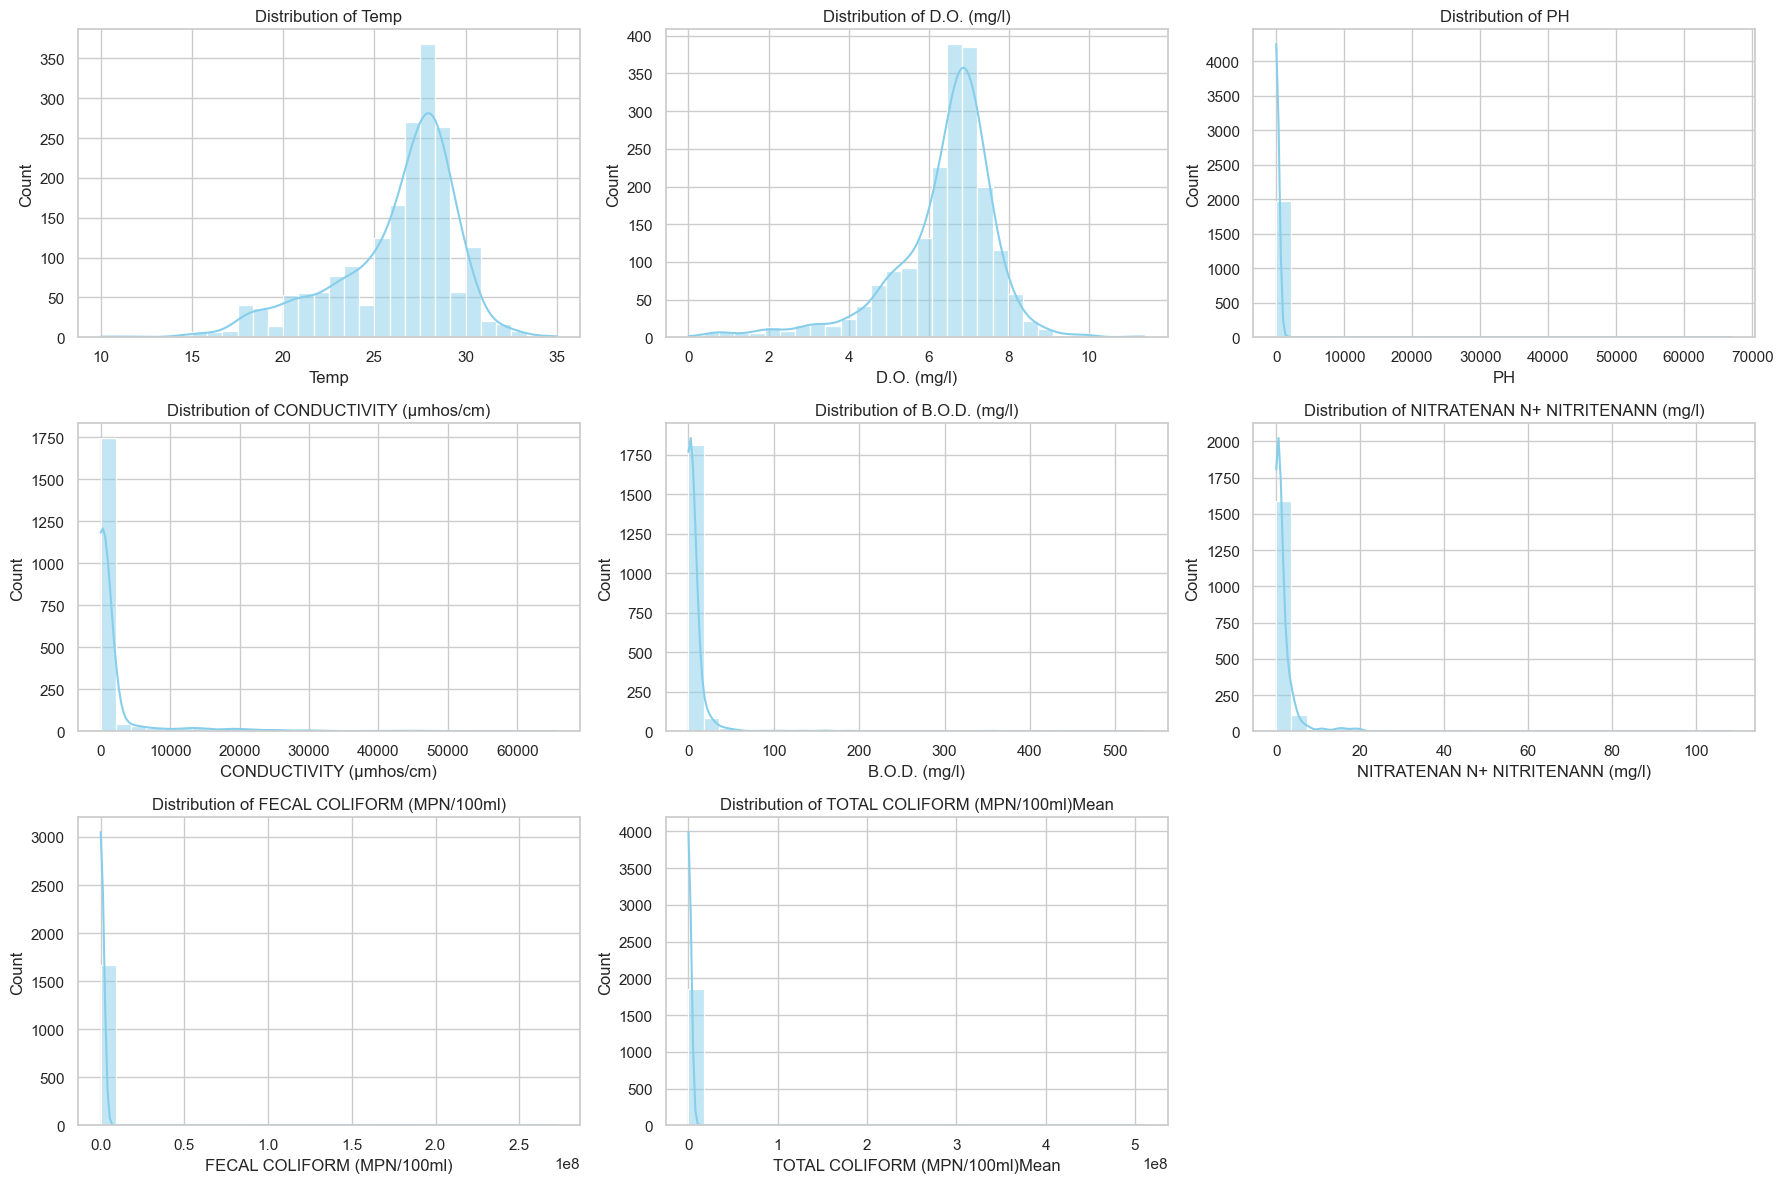

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Histograms for numeric features
plt.figure(figsize=(18,12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3,3,i+1)
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


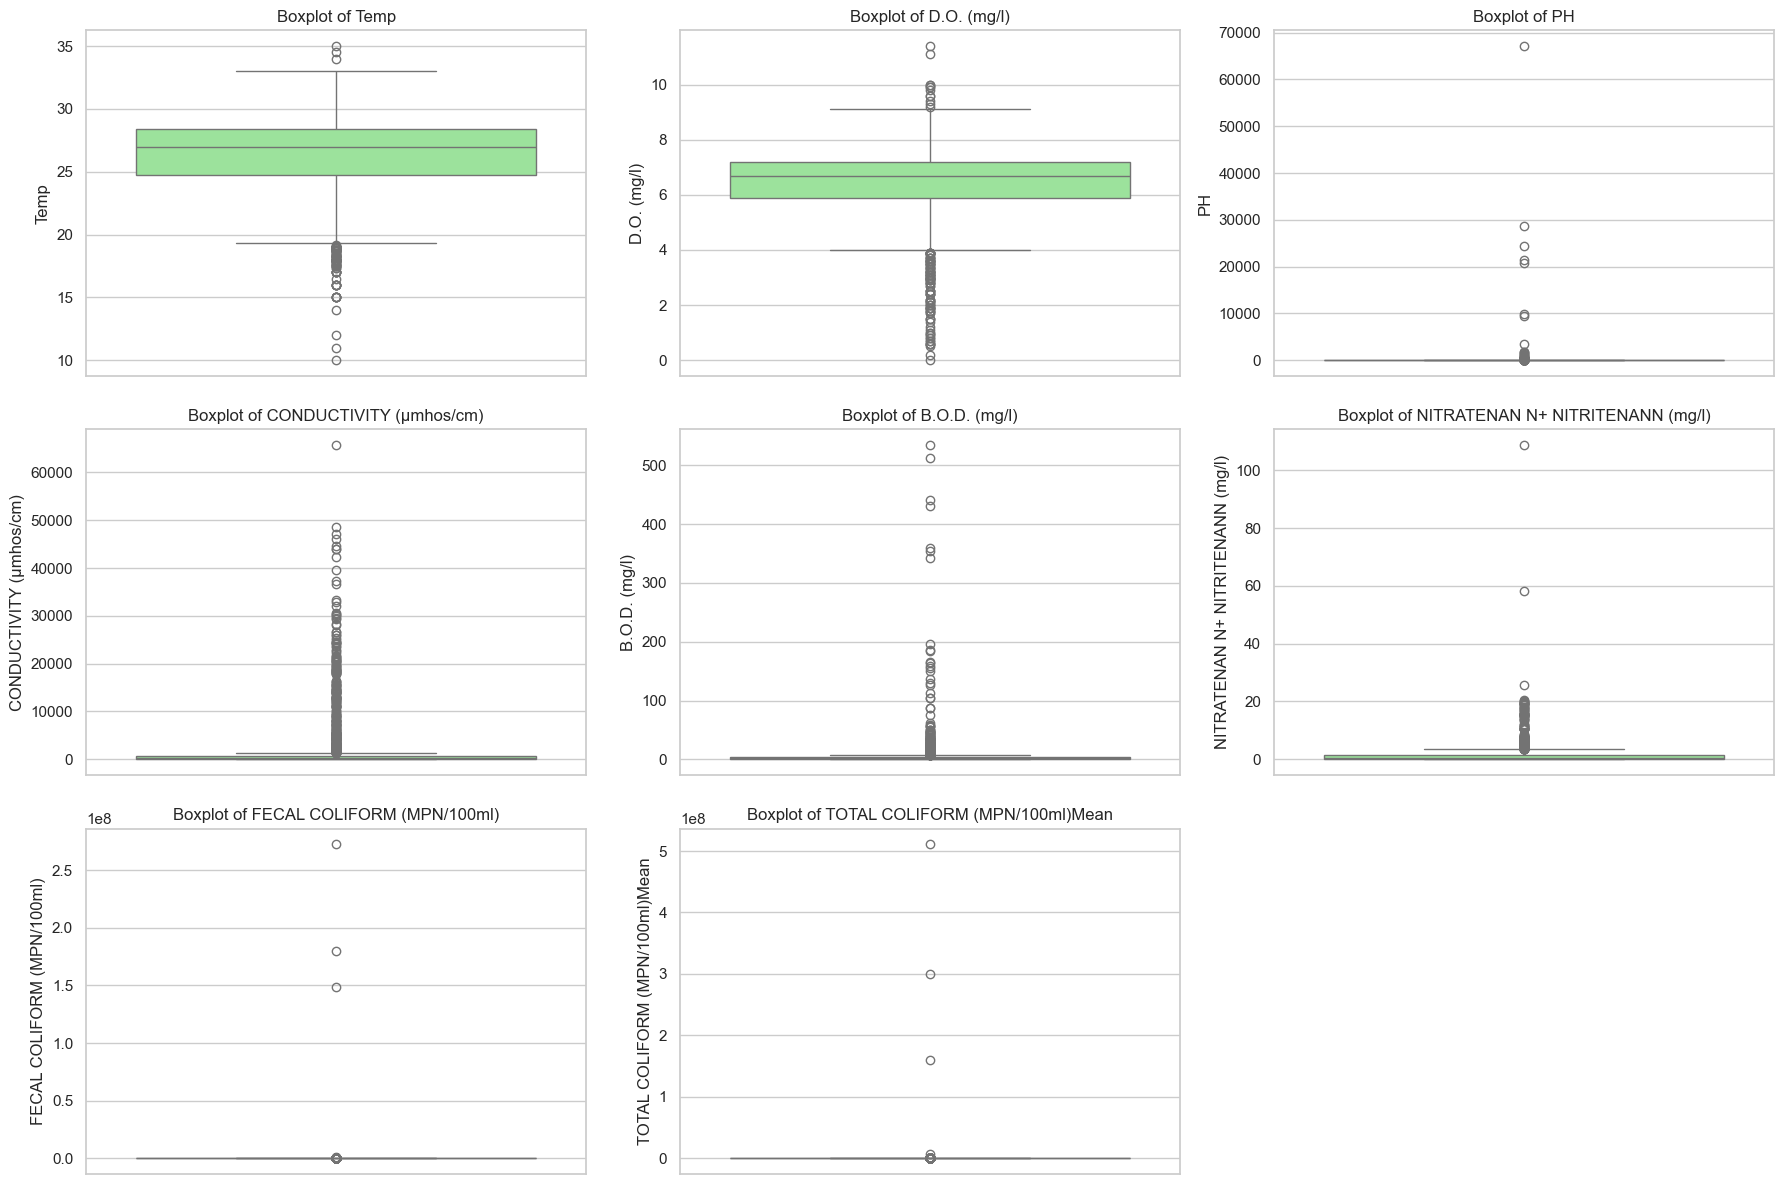

In [7]:
# Boxplots to detect outliers
plt.figure(figsize=(18,12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[feature], color='lightgreen')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


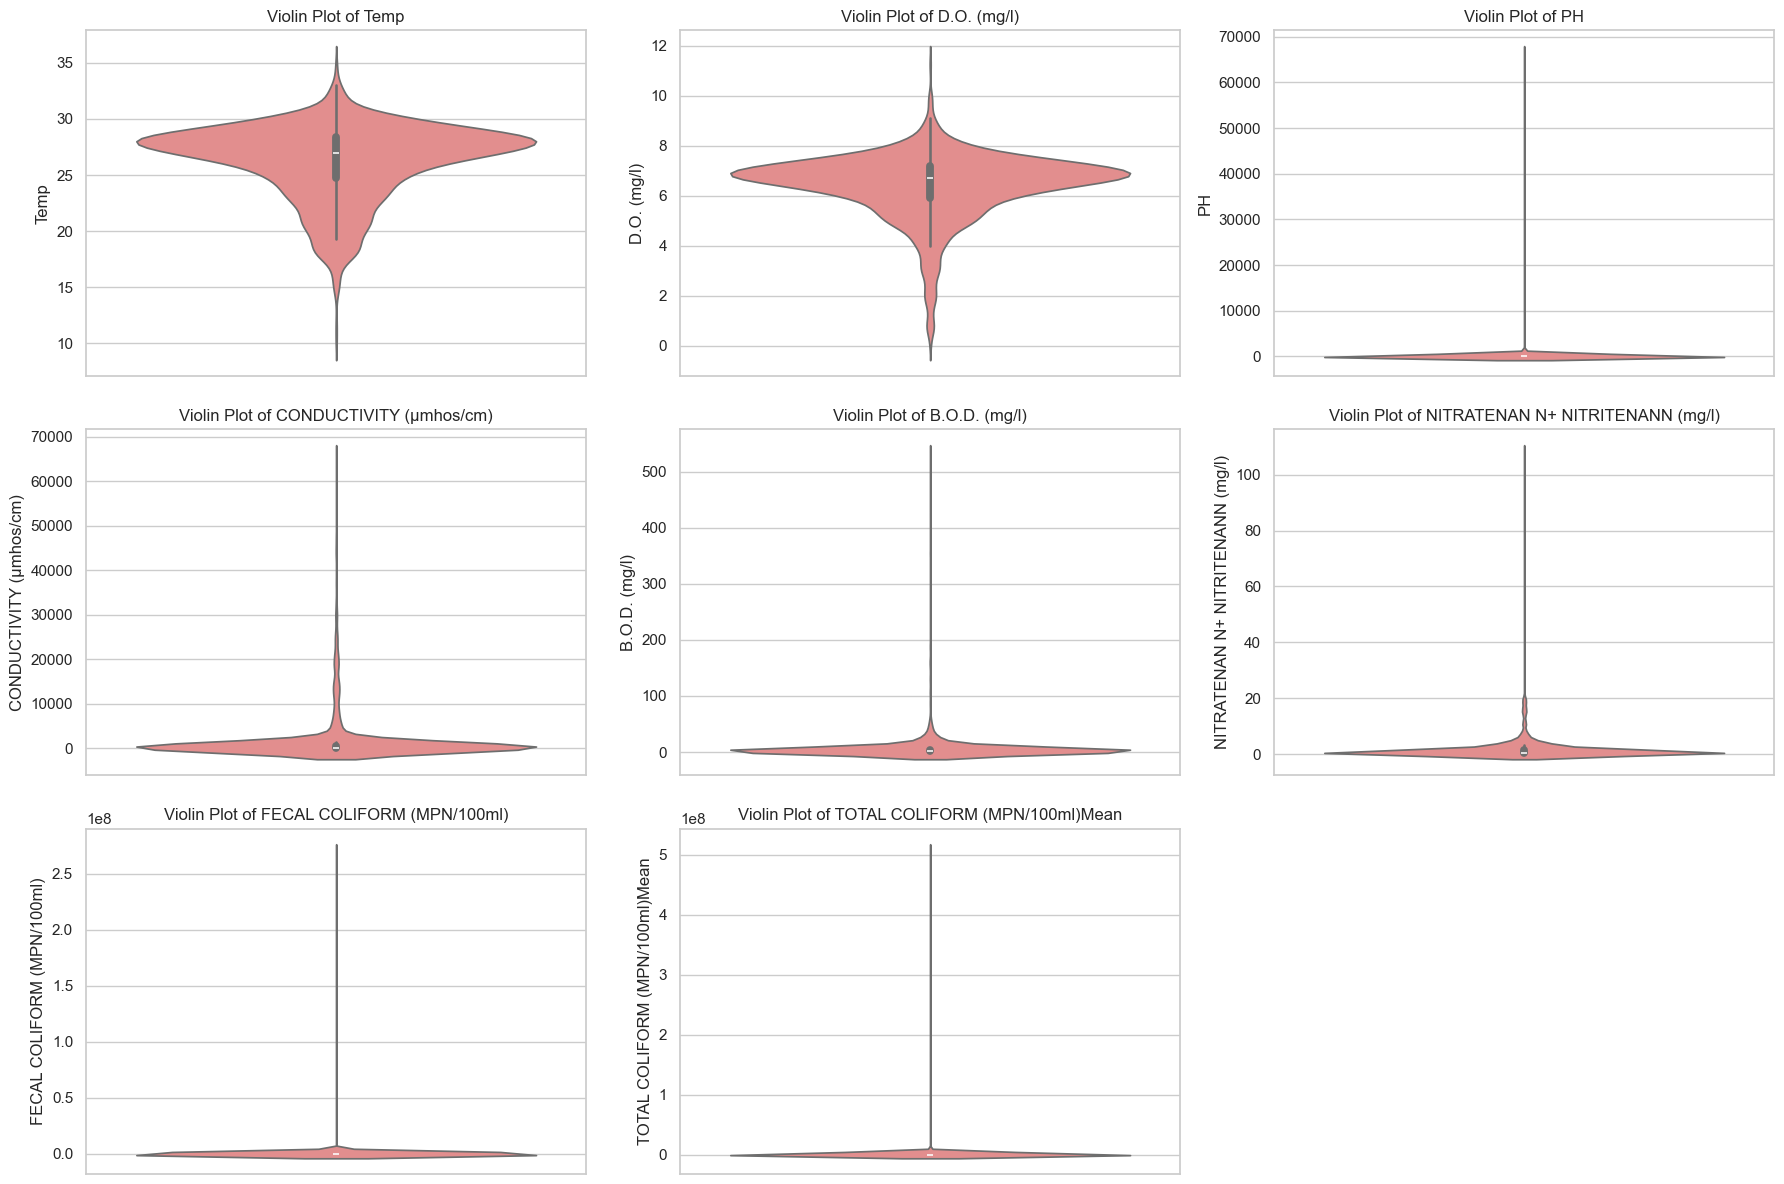

In [9]:
# Violin plots show distribution and density
plt.figure(figsize=(18,12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3,3,i+1)
    sns.violinplot(y=df[feature], color='lightcoral')
    plt.title(f'Violin Plot of {feature}')
plt.tight_layout()
plt.show()


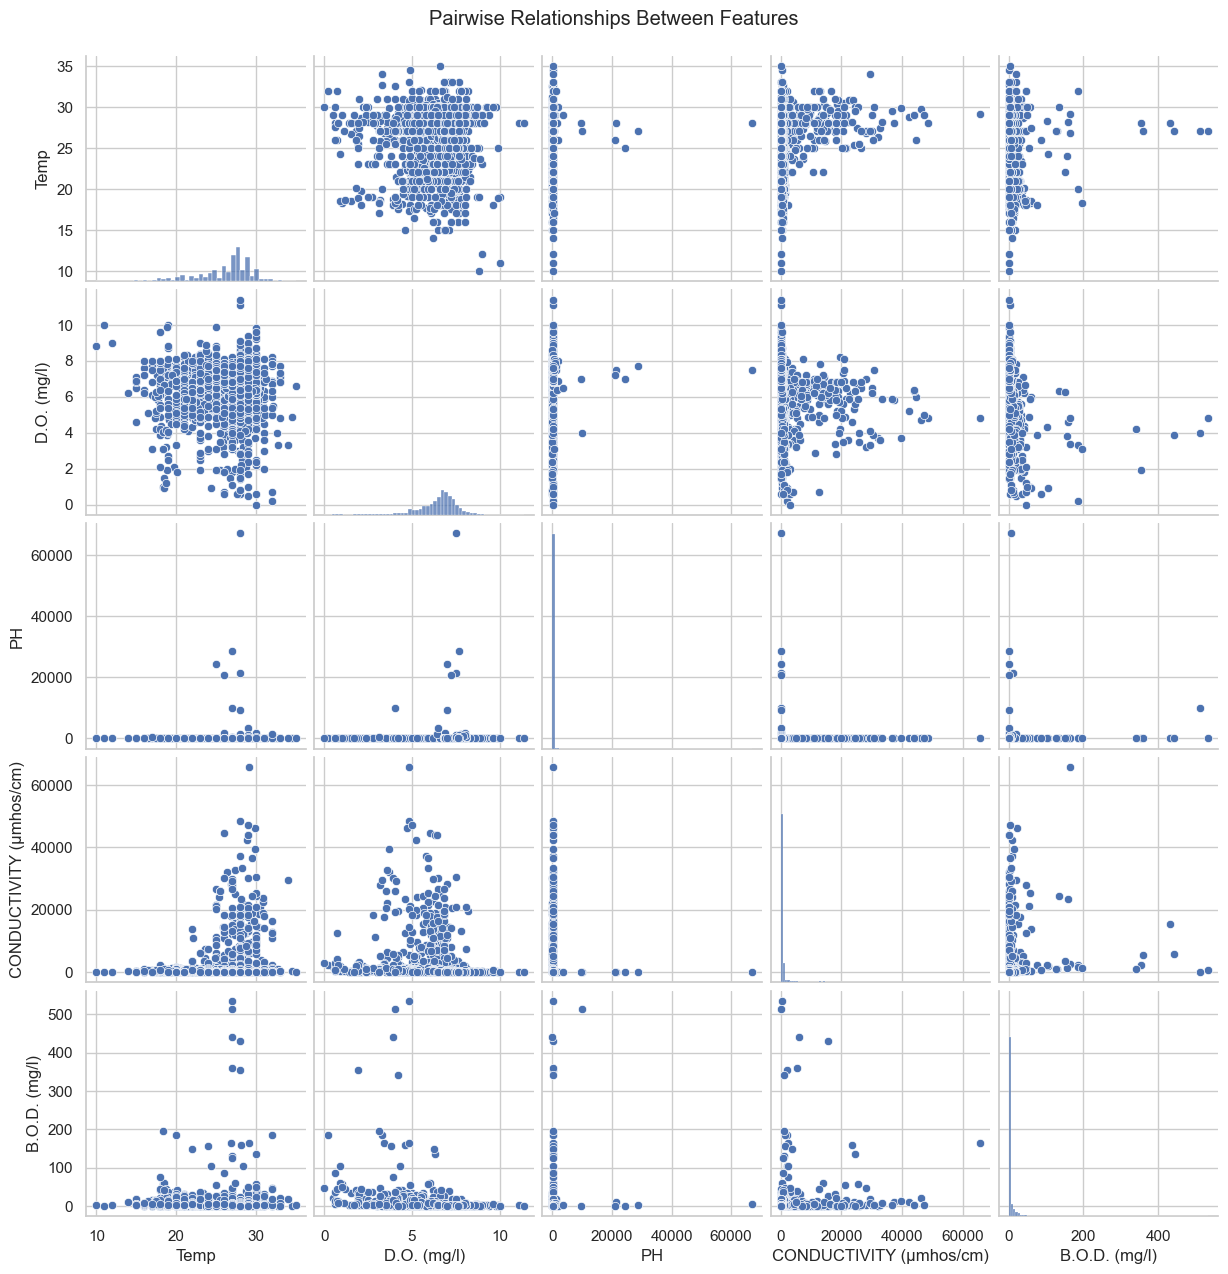

In [10]:
# Pairplot for key numeric features
sns.pairplot(df[numeric_features[:5]])  # choose first 5 to avoid clutter
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()


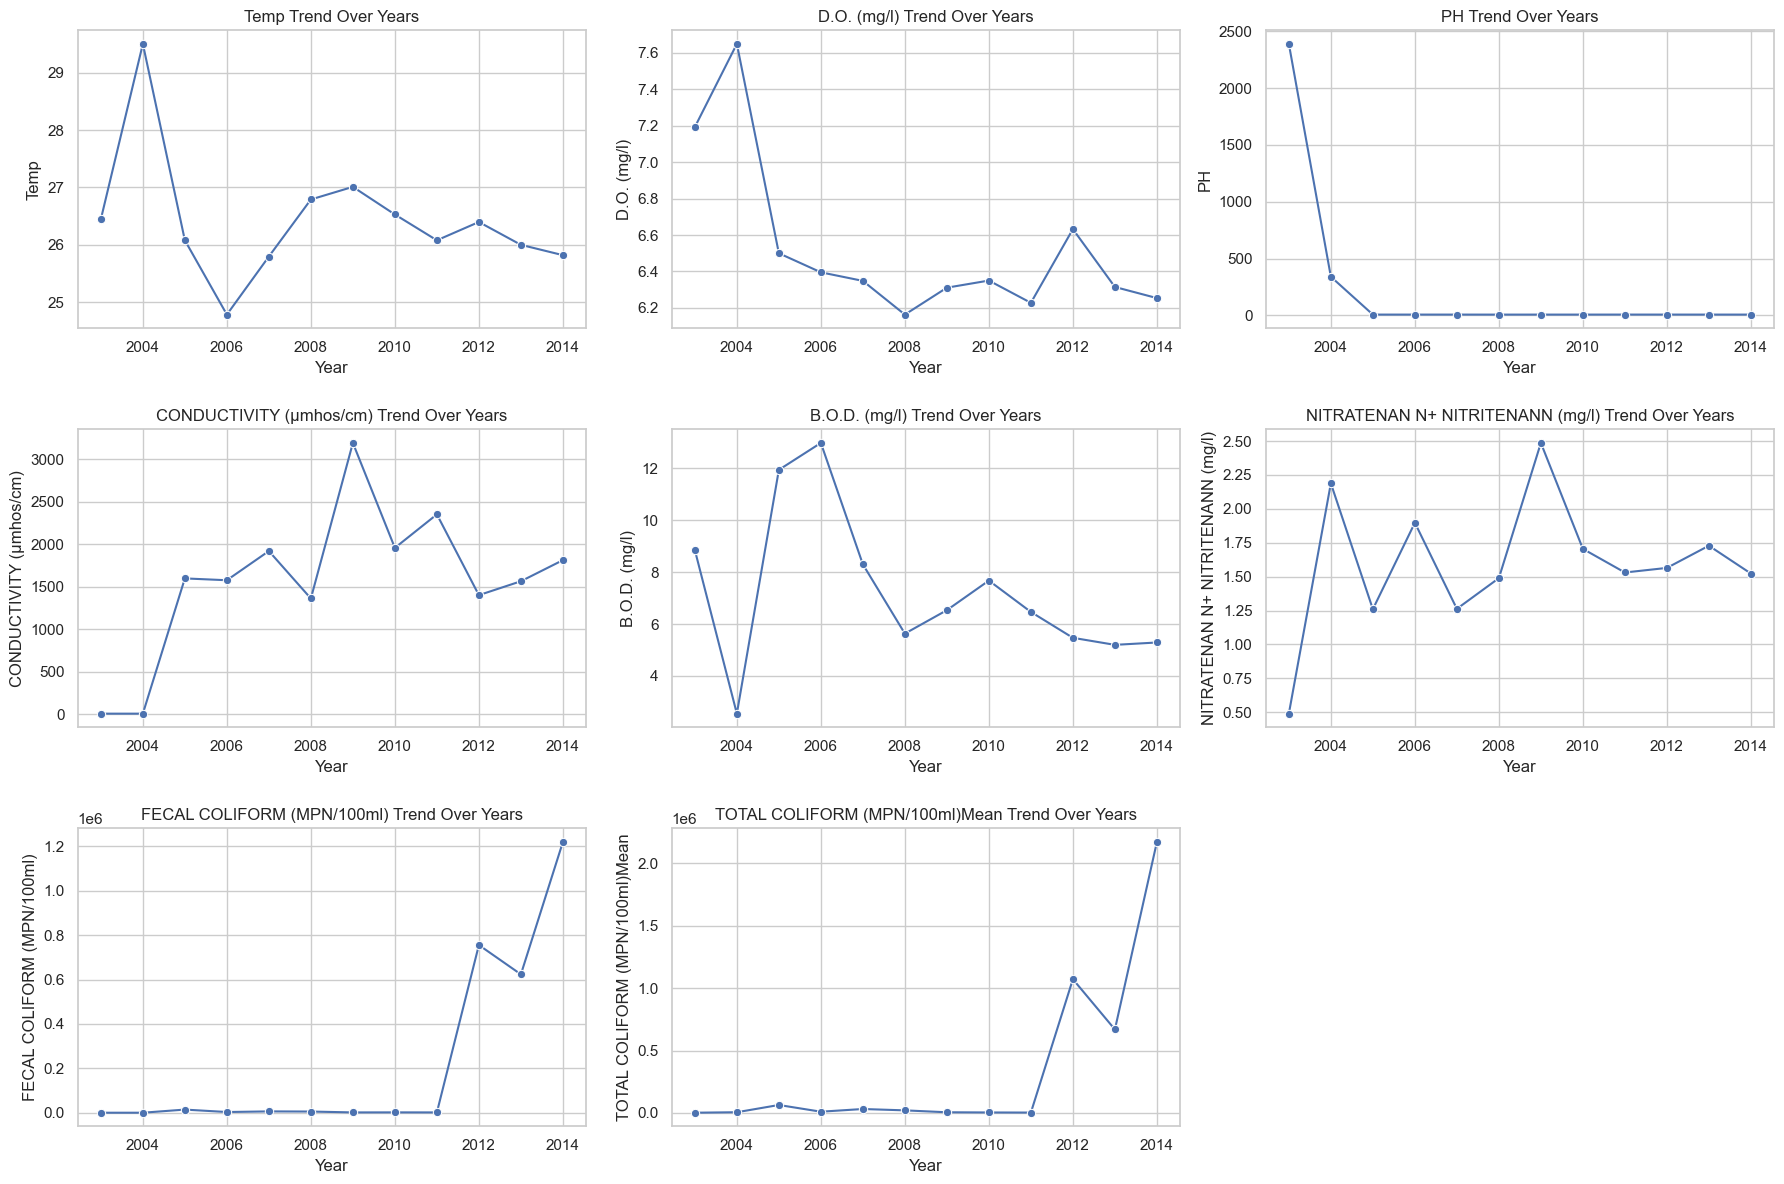

In [11]:
# Aggregate numeric features by year
yearly_trends = df.groupby('year')[numeric_features].mean().reset_index()

plt.figure(figsize=(18,12))
for i, feature in enumerate(numeric_features):
    plt.subplot(3,3,i+1)
    sns.lineplot(data=yearly_trends, x='year', y=feature, marker='o')
    plt.title(f'{feature} Trend Over Years')
    plt.xlabel('Year')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

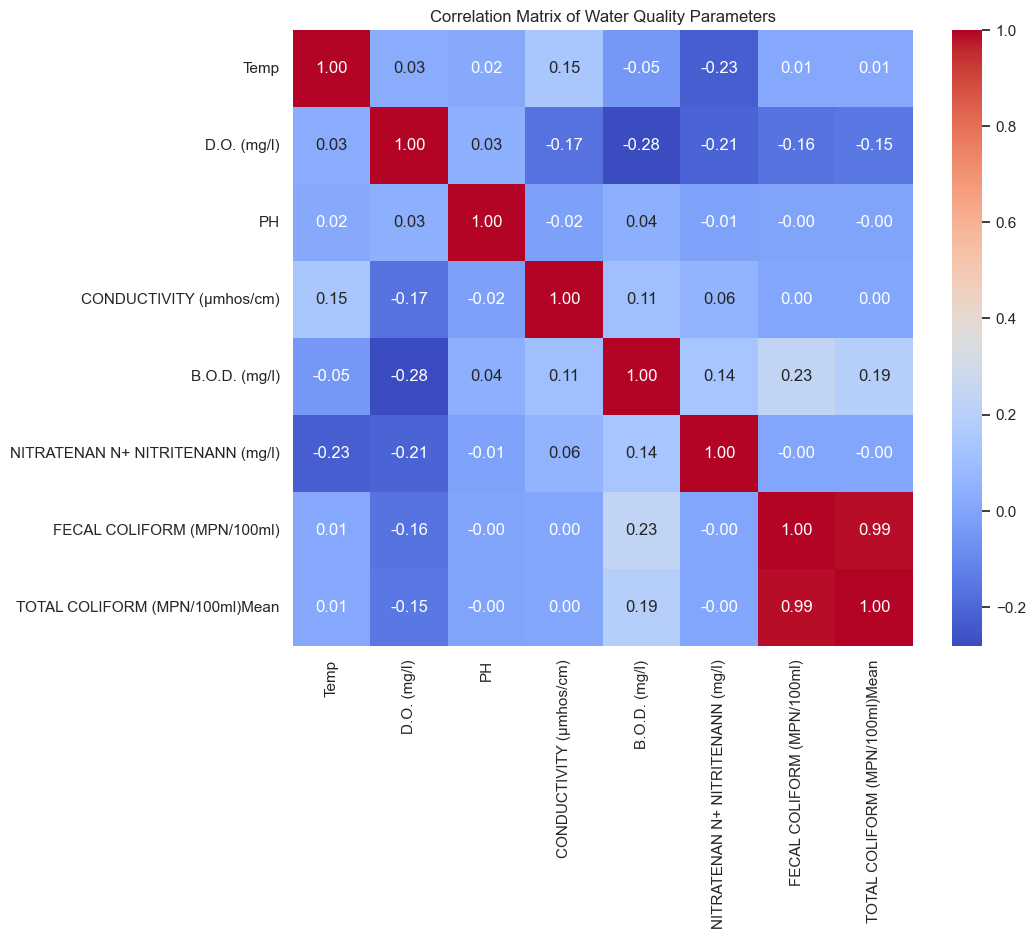

In [12]:
# Compute correlation matrix
corr_matrix = df[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Water Quality Parameters")
plt.show()

/var/folders/6c/rnjkx6x93s3fmpw2c_pb90zr0000gn/T/ipykernel_2979/3675672418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_ph.values, y=state_ph.index, palette='magma')


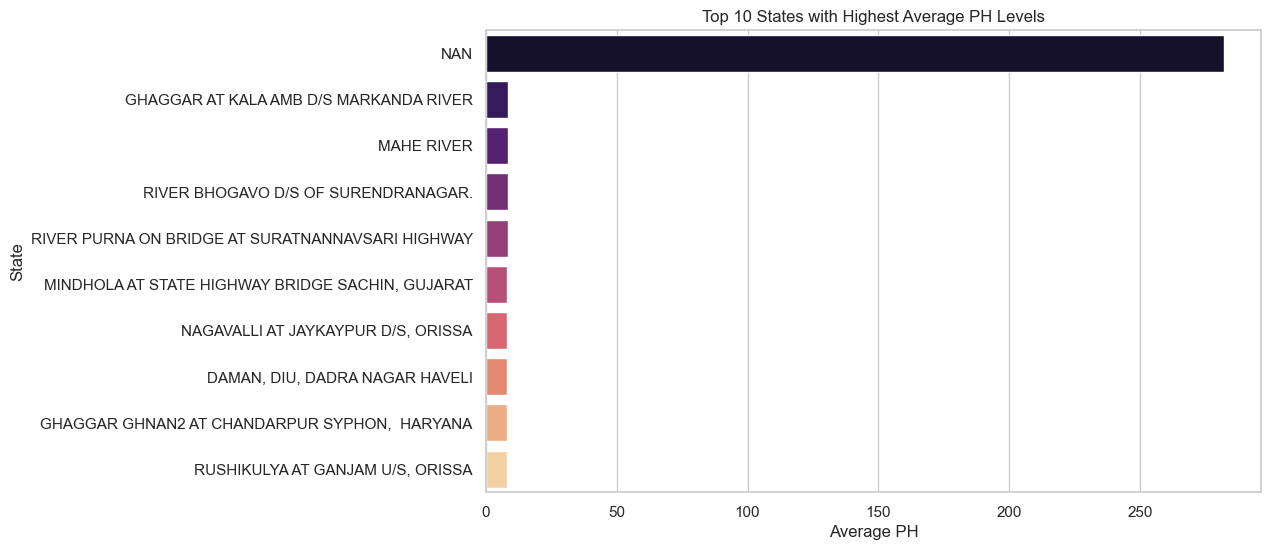

In [13]:
# Aggregate average pH by state
state_ph = df.groupby('STATE')['PH'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=state_ph.values, y=state_ph.index, palette='magma')
plt.title('Top 10 States with Highest Average PH Levels')
plt.xlabel('Average PH')
plt.ylabel('State')
plt.show()


/var/folders/6c/rnjkx6x93s3fmpw2c_pb90zr0000gn/T/ipykernel_2979/1866852556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_do.values, y=state_do.index, palette='cool')


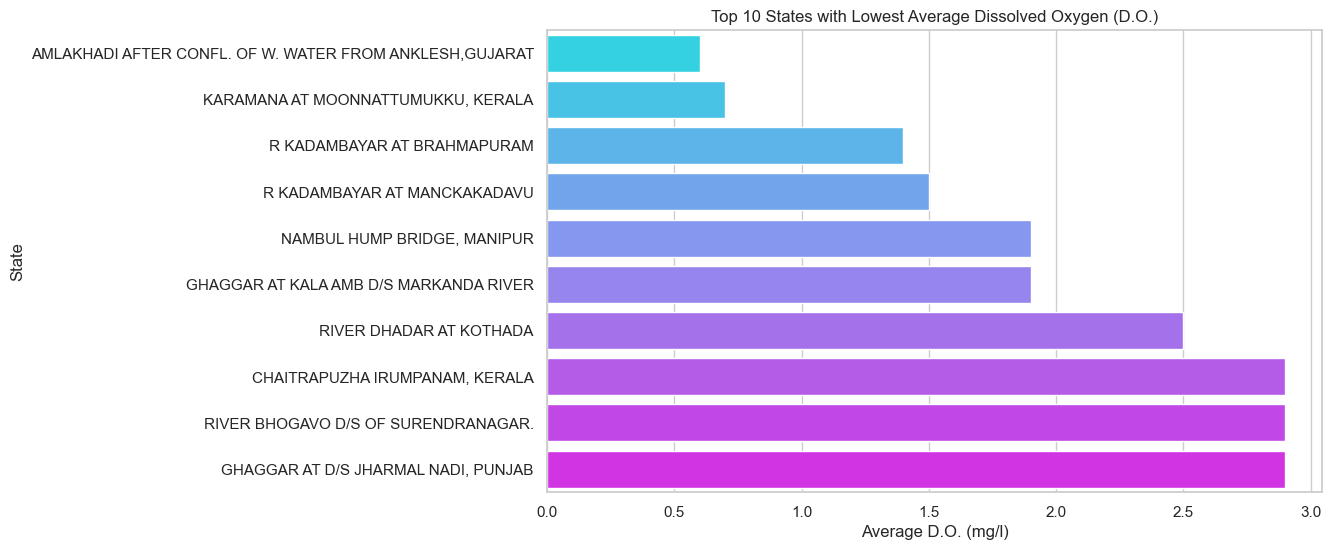

In [14]:
# Example: Top 10 states with lowest Dissolved Oxygen (D.O.) – indicates poor water quality
state_do = df.groupby('STATE')['D.O. (mg/l)'].mean().sort_values().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=state_do.values, y=state_do.index, palette='cool')
plt.title('Top 10 States with Lowest Average Dissolved Oxygen (D.O.)')
plt.xlabel('Average D.O. (mg/l)')
plt.ylabel('State')
plt.show()



In [15]:
# Save the cleaned dataset
explored_dataset_path = "water_dataX_explored.csv"
df.to_csv(explored_dataset_path, index=False, encoding='utf-8')

print(f"Explored dataset saved as {explored_dataset_path}")


Explored dataset saved as water_dataX_explored.csv
